# Project 4 - Extrasolar Planets

**Project deadline:** This project is due for submission on Wednesday, 22.07.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you four projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Scientific Background

In this problem set, we are going to investigate a dataset that contains the *radial velocity* of a star at various points in time. The radial velocity is the velocity with which the star is moving towards or away from us (positive velocities indicate it is moving away from us).

If a star is not close to any other objects, there is no reason why the radial velocity should change over time. However, in the case where a second object is orbiting a star (such as a planet or another star), the star and the object will both orbit the center of mass of the two-body system. Therefore, the star will show periodic variations in its velocity over time. These changes in velocity then cause a shift in spectral lines via the Doppler effect, which we can measure with telescopes that have state-of-the art spectrographs. The smaller the second object, the less the star will be affected. For example, the Earth causes the Sun to change its velocity with an amplitude of 0.1 m/s over 1 year.

See the following video to see an example of a large planet orbiting a star and the effect on the observed spectral lines of the star:

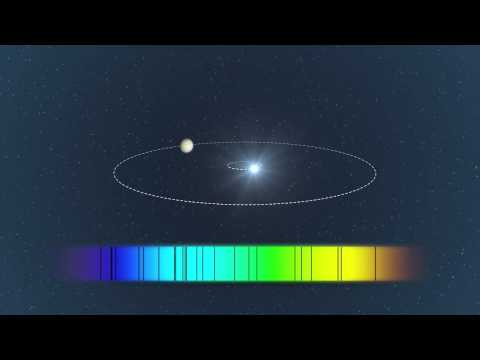

In [44]:
from IPython.display import YouTubeVideo
YouTubeVideo("-BuwWtMygxU")

Measuring the radial velocity of stars to very high precision can therefore be used to find planets. Note that we cannot simply measure the velocity of planets around other stars, since they are much fainter than the stars themselves.

In this project, we want to find out whether a particular star has a companion object, and if so, we want to estimate the probability that the companion object is a planet.

This project consists of two parts. In the first part, you will learn about a Monte-Carlo method to estimate errors from a quantity that is compound of other quantities with measurement errors. You will need this method to estimate errors on the mass from the stars companion in the second part.

## Part 1: Monte-Carlo Error Propagation

You have likely encountered the concept of propagation of uncertainty before in some lab-courses (see [the usual rules here](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)). The idea is that given measurements with uncertainties, we can find the uncertainty on the final result of an equation.

For example, let us consider the following equation:

$$F = \frac{G~M_1~M_2}{r^2}$$

which gives the gravitational force between two masses $M_1$ and $M_2$ separated by a distance $r$.

Let us now imagine that we have two masses:

$$M_1=40\times10^4\pm0.05\times10^4\rm{kg}$$

and

$$M_2=30\times10^4\pm0.1\times10^4\rm{kg}$$

separated by a distance:

$$r=3.2\pm0.011~\rm{m}$$

where the uncertaintes are the standard deviations of Gaussian distributions which could be e.g. measurement errors.

We also know:

$$G = 6.67384\times10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$$

(exact value, no uncertainty)

Use the [standard error propagation rules](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) to determine the resulting force and uncertainty in a `python`-program (you can just derive the equation by hand and implement it in a single line in your code).

Now, we can try using a **Monte-Carlo** technique instead. The idea behind Monte-Carlo techniques is to generate many possible solutions using random numbers and using these to look at the overall results. In the above case, you can propagate uncertainties with a Monte-Carlo method by doing the following:

* randomly sample values of $M_1$, $M_2$, and $r$, 1 million times, using the means and standard deviations given above.

  **Hint:** You can get random numbers which are distributed according to the normal (Gaussian) distribution with the `normal` command within the `numpy.random` module.

* compute the gravitational force for each set of values.

You should do this with Numpy arrays, and **without any loops**. You should then get an array of 1 million different values for the forces.

Make a plot of the *normalized histogram* of these values of the force, and then overplot a Gaussian function with the mean and standard deviation derived with the standard error propagation rules. Make sure that you pick the range of x values in the plot wisely, so that the two distributions can be seen. Make sure there are also a sensible number of bins in the histogram so that you can compare the shape of the histogram and the Gaussian function. The two distributions should agree pretty well.

For your reference, here is the plot that I obtain for this part of the project:

<img src="figs/monte_carlo_force.png" style="width: 400px;" style="height: 400px;">

The blue bars are the normalized histogram of my Monte-Carlo simulated forces. The red curve gives the Gaussian prediction for these forces from standard error propagation.  

Now repeat the experiment above with the following values:

$$M_1=40\times10^4\pm 8\times10^4\rm{kg}$$
$$M_2=30\times10^4\pm 6\times10^4\rm{kg}$$
$$r=3.2\pm 0.6~\rm{m}$$

and as above, produce a plot.

In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique to estimate errors?

## Part 2: Analysis of a Extrasolar Planet candidate

The data file required for this project is [data/UID_0113357_RVC_001.tbl](data/UID_0113357_RVC_001.tbl). It was obtained from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/DisplayOverview/nph-DisplayOverview?objname=51+Peg+b&type=CONFIRMED_PLANET). Obtain the file, and then carry out the analysis described in Tasks 1 and Tasks 2.

**The first column is the time in days, the second column is the radial velocity in m/s, and the third column is the uncertainty in the radial velocity in m/s.** The fourth column can be ignored.

## Task 1 - Determination of the radial velocity of the host star

To start off, we want to see whether the star does indeed show periodic variations, and if so, we want to measure the period and amplitude. The amplitude is then a direct measure of the radial velocity.

**Read in the data and make a plot of the radial velocity in the file against time.** (make sure you include axis labels, units, and error bars!).

As you will see, the observations were not taken with equal spacing in time, and it does not look like we can easily see any periodic variations in the curve by eye, so we will instead use an automated method. The best way to find the period of a time series like this is to use a periodogram algorithm. One algorithm that works well in our case is the following:

1. pick a ``period``

2. compute the phase of the radial velocity curve:

        phase = (time % period) / period

3. sort the phase and velocity points by the phase.

4. find the length of a line that would join all the points, from left to right. If we write the sorted phase as $\phi$, the velocity as $v$, and the number of points as $N$, then this is:

  $$l = \sum_i^{N-1}{\sqrt{(\phi_{i+1} - \phi_{i})^2 + (v_{i+1} - v_{i})^2}}$$
  
  **Note:** Please consider the phase, the velocity and the length within the formula above as *unitless* quantities.  
5. repeat for different periods, and minimize the string length $l$.

**Implement this algorithm** and try and find the *string length* $l$ for 10,000 periods logarithmically spaced between 1 and 100 days. Note that the calculation of the string length should not use any loops, otherwise it will be very slow (but you can still loop over the periods).

**Hints:**

1. Please have a look at `np.logspace` to create a logarithmically spaced grid.

2. if you want to sort an array ``y`` according to the values of ``x``, you can use [np.argsort](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html):

    y_new = y[np.argsort(x)]

**Make a log-log plot of the string length versus the period** and describe the plot. You should see several clear minima. **Find the period** of the first clear minimum (optional question: why the first? what do the other minima correspond to?).

**Make a plot** of radial velocity (with error bars) versus phase for the period you found above, and if you have picked the period correctly you should see something that looks similar to one period of a sinusoidal function. This means that there are indeed periodic (and in fact sinusoidal) variations in the radial velocity curve, indicating that a second object is likely orbiting the star!

**Fit the radial velocity versus phase** using a function of the form:

$$f(x) = a \sin{(2\pi x + b)}$$

and **make a plot** of the radial velocity (with error bars) and with the best-fit overplotted.

The parameter $a$ will give the amplitude of the radial velocity curve (if it gives a negative value, be sure to make it positive for the next Task). **Find the uncertainty on $a$** using the covariance matrix returned by the fitting function.

You should now have the period, and the amplitude (with uncertainty) of the radial velocity curve!

## Task 2 - Mass analysis of the extrasolar planet *51 Peg b*

In this task, we will now try and estimate the mass of the invisible companion that is orbiting the star. At the end of Task 1, we found that the radial velocity curve could be well fit by a sinusoidal curve, which suggests that the invisible companion is on a circular orbit (at least to a good approximation).

For two bodies (in our case a star and an unknown object) orbiting a common center of mass in circular orbits, Kepler's 3rd law of motion states that:

$$\frac{4\pi^2}{T^2} = \frac{G M_\star (1 + q)}{R^3}$$

where $T$ is the orbital period, $M_\star$ is the mass of the star, $q$ is the ratio of the object mass to the mass of the star, and $R$ is the distance between the object and the star.

In addition, for two objects orbiting a common center of mass, the amplitudes of the velocities $K$ will be related to the mass of the two objects - with the more massing one moving less:

$$\frac{K_\star}{K_{\rm object}} = q$$

Finally, for a circular orbit:

$$K_{\rm object} T = 2\pi R$$

Substituting this back into Kepler's law and simplifying gives:

$$(1 + q)~q^3 = \frac{T K_{\rm star}^3}{2\pi G M_\star}$$

Finally, there is one final important thing to consider, which is that the velocity amplitude we measure for the star is not $K_{\rm star}$ but

$$K_{\rm obs,star} = K_{\rm star}~\sin{i}$$

where $i$ is the viewing angle of the system ($i=90^\circ$ means that we are observing the system *edge-on*, and $i=0^\circ$ corresponds to a *face-on* orientation where we would not see the star move towards or away from us). $K_{\rm obs,star}$ is the amplitude of the velocity - the ``a`` parameter - that you determined in Task 1.

Therefore, assuming $q << 1$, the final equation is:

$$q \approx \left(\frac{T}{2\pi G M_\star}\right)^{1/3} \frac{K_{\rm obs,star}}{\sin{i}}$$

**Compute the value of $q$** assuming the values of $T$ and $K_{\rm obs,star}$ you found in Part 1, and assuming $\sin{i}=1$ and assuming that $M_\star$ is the mass of the Sun ($M_\star=1.989\times 10^{30}$kg). Using $q$, derive the mass of the object in units of the mass of Jupiter ($M_{\rm Jupiter}=1.898\times 10^{27}$kg). Is the object likely to be a planet (see below)?

In reality, your measurement of $K_{\rm obs,star}$ has uncertainties, the mass of the star is uncertain, and the viewing angle is also uncertain. **Carry out a Monte-Carlo error propagation** simulation (as in Part 1 of this project) to find the likely distribution of masses for the object assuming that:

* the error on the radial velocity is the one derived in Part 1 and is a *normal* error (i.e. the distribution follows a Gaussian)

* the mass of the star is sampled from a *uniform distribution* between 0.6 and 1.4 times the mass of the Sun.

* the viewing angle can be anywhere between 0 and 90 degrees. However, one cannot simply sample $i$ randomly between 0 and 90 because some viewing angles are more likely than others - to do it properly you need to sample $\cos{i}$ uniformly between 0 and 1, then derive $i$ or $\sin{i}$ from this.

From the Monte-Carlo simulation, **plot a histogram** of the probability that the object has a certain mass, and show only the range from 0 to 13 times the mass of Jupiter.

**What is the (numerical) probability that the object is less massive than 13 times the mass of Jupiter?** (this is usually considered to be the upper limit for the mass of a planet). What degree of confidence do we have that the object is a planet, using the 1/2/3/4/5-sigma confidence terminology? (see [here](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) for more information).

Based on this, what can you conclude about the object?

In [45]:

#All the modules necessary has been imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy import special
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
import scipy as scipy 
import scipy.optimize as opt

### Part 1: 

#### In order to calculate Force we use the formula:
#### $$F = \frac{G~M_1~M_2}{r^2}$$
#### and in order to calculate the uncertainity in F, we use the following formula:
#### $$\sigma_F = {\sqrt{{{({\frac{\delta F}{\delta M_1}})}^2} \sigma_{M_1^2} + {(\frac{\delta F}{\delta M_2})}^2 \sigma_{M_2^2} + {{({\frac{\delta F}{\delta r}})}^2} \sigma_{r^2}}}$$
#### where, $\sigma_F=$ uncertainity in F, 
#### $\sigma_{r}= $ uncertainity in r,
#### $\sigma_{M_1}=$ uncertainity in $M_1$ and 
#### $\sigma_{M_2}=$ uncertainity in $M_2$
#### After solving we get the uncertainity to be following,
#### $$ \sigma_F= \frac{G}{r^2}{\sqrt{{M_2^2}{\sigma_{M_1}^2}+{M_1^2}{\sigma_{M_2}^2}+(\frac{2M_1 M_2 \sigma_r}{r})^2}}$$

In [46]:

def F(m1,m2,r): # define force as a function of Masses and distance
    Force = G*m1*m2*(1/(r*r))
    return Force
def F_err(m1,m1_err,m2, m2_err, r, r_err): # define the uncertainity in Force
    a = G/(r**2)
    a1= (m2*m1_err)**2
    a2= (m1*m2_err)**2
    a3= (2*m1*m2*r_err/r)**2
    
    u= a*np.sqrt(a1+a2+a3)
    return u
G=6.64*10**(-11) # Gravitational constani in units of  m^3 kg ^-1 s^-2 
m1, m1_err=  40e4, 0.05e4 # m1_err = uncertainity in M1

m2, m2_err=  30e4, 0.1e4 # m2_err = uncertainity in M2
 
r, r_err=3.2, 0.011 # # r_err = uncertainity in distance

print('The value of F is: ',F(m1,m2,r),'N')
print('The uncertainity in the value of F is:',F_err(m1,m1_err,m2, m2_err, r, r_err),'N')

The value of F is:  0.7781249999999998 N
The uncertainity in the value of F is: 0.006024277525832616 N


 Therefore, the value of Force using the standard error propagation rules we get: 0.7781249999999998 $\pm$ 0.006024277525832616 N


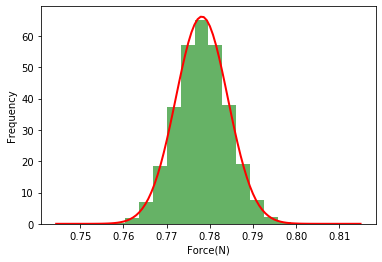

0.778146942355609 0.006021825465450496


In [47]:
M_1 = np.random.normal(m1, m1_err, 1000000) # randomly sample M1 a million times
M_2 = np.random.normal(m2, m2_err, 1000000) # randomly sample M2 a million times
r = np.random.normal(r, r_err, 1000000) # randomly sample r a million times


grav_f = F(M_1,M_2,r) # teh force function defined above

# Fit a normal distribution to the data:
mean, std = norm.fit(grav_f) # Return Maximum Likelihood Estimates for shape , location, and scale parameters from data.In this case we feed the force function to the fit module

# Plot the histogram.
plt.hist(grav_f, bins=20, density=True, alpha=0.6, color='Green')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)
plt.xlabel('Force(N)')
plt.ylabel('Frequency')
plt.show()
print(mean, std)

In [48]:
print('The mean from the fit is, F=', mean,'N')
print('The uncertainity from the fit is:', std,'N')

The mean from the fit is, F= 0.778146942355609 N
The uncertainity from the fit is: 0.006021825465450496 N


#### From above we see that the mean and standard deviation values of Force calculated using Monte Carlo method is in pretty well agreement with the ones calculated using the standard error propagation rules

In [49]:
m1, m1_err=  40e4, 8e4 # m1_err = uncertainity in M1

m2, m2_err=  30e4, 6e4 # m2_err = uncertainity in M2
 
r, r_err=3.2, 0.6 # # r_err = uncertainity in distance

print('The value of F is: ',F(m1,m2,r),'N')
print('The uncertainity in the value of F is:',F_err(m1,m1_err,m2, m2_err, r, r_err),'N')

The value of F is:  0.7781249999999998 N
The uncertainity in the value of F is: 0.36549103615515055 N


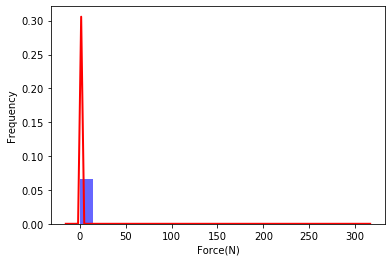

The mean from the fit is, F= 0.881251319778997 N
The uncertainity from the fit is: 0.6175227691723895 N


In [50]:
m1, m1_err = 40e4, 8e4
m2, m2_err = 30e4, 6e4
r, r_err = 3.2, 0.6
M_1 = np.random.normal(m1, m1_err, 1000000)
M_2 = np.random.normal(m2, m2_err, 1000000)
r = np.random.normal(r, r_err, 1000000)
grav_f = F(M_1,M_2,r)

# Fit a normal distribution to the data:
mean, std = norm.fit(grav_f)

# Plot the histogram.
plt.hist(grav_f, bins=20, density=True, alpha=0.6, color='blue')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)
plt.xlabel('Force(N)')
plt.ylabel('Frequency')
plt.show()
print('The mean from the fit is, F=', mean,'N')
print('The uncertainity from the fit is:', std,'N')

#### I think Monte Carlo simulation is more accurate because when we are sampling the masses and distance, each value of mass and distance has a respective error associated with it and this influences the final result we obtain. 
#### But if we just compare the values of mean and uncertainity in the cases with standard calculation and that of Monte Carlo simulation for the case with comparatively less error, we see that both agree pretty well with each other, so just with this it is difficult to say which one is better. 
#### On the other hand in the second case, where the error is more, the value of mean Force obtained with the monte carlo method deviates from the one that we observe in previos case. This is because the calculation is influenced by the error in the samples and hence is a more accurate estimation.


### Part 2:  Task 1 - Determination of the radial velocity of the host star

In [51]:
data = np.loadtxt('data/UID_0113357_RVC_001.tbl') # the data file is read using numpy.loadtext function
time = np.array(data[:,0]) # 1st column of data indicating time in days
rad_vel = np.array(data[:,1])  # 2nd column of data indicating radial velocity in m/s
err = np.array(data[:,2])  # 3rd column of data indicating the uncertainty in the radial velocity in m/s

Text(0, 0.5, 'Radial velocity (m/s)')

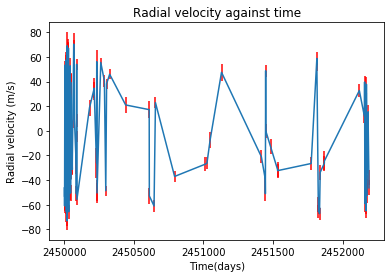

In [52]:
plt.errorbar(time,rad_vel,yerr=err, ecolor='red')
plt.title('Radial velocity against time')
plt.xlabel('Time(days)')
plt.ylabel('Radial velocity (m/s)')

#### From above we see that the plot does not show a periodic variation (atleast not one that can be detected by eye). This is because the measurements were not uniform in time. So we use a periodogram algorithm which is as follows:

In [53]:
period_1 = 3000 # We choose an arbitrary period

phase = (time%period_1)/period_1 # phase of the radial velocity curve

ph_sort = np.sort(phase) # we sort the phase values 

rad_vel_sort = rad_vel[np.argsort(phase)] # we sort the radial velocity  according to the values of phase using np.argsort

l = np.sum(np.sqrt((ph_sort[1:]-ph_sort[:-1])**2+(rad_vel_sort[1:]-rad_vel_sort[:-1])**2)) # string length of a line that would join all the points, from left to right
print(" The string length is :" ,l ,'m') 

 The string length is : 5251.206709199836 m


In [54]:
# we define the string length as a function of period
def length(period):
    phase=(time%period)/period
    phase_sort=np.sort(phase) # sorted phase
    rad_vel_sort=rad_vel[np.argsort(phase)] # sorted radial velocity as per phase
    ph_sq=(phase_sort[1:]-phase_sort[:-1])**2 # (phase_i+1 -phase_i)^2
    rad_vel_sq=(rad_vel_sort[1:]-rad_vel_sort[:-1])**2 # (v_i+1 -v_i)^2 where v=radial velocity sorted
    length=np.sum(np.sqrt(ph_sq + rad_vel_sq)) # string length
    return length

periods=np.linspace(1000,10000,10)# we try for 10 different period values ranging from 1000 to 10,000 to see which give us minimum string length
string_length=np.zeros(len(periods)) # I define string length as an empty array containing 0s

for i in range(len(periods)): # start of loop for calculating string length for different values of periods
    string_length[i]=length(periods[i])

period_min=np.where(string_length == np.min(string_length)) # this give the index for whic string length is minimum and using this index we can easily find the corresponding period
print(" The period for minimum string length is ",int(periods[period_min])) # the period which gives the minimum string length

 The period for minimum string length is  4000


Text(0, 0.5, 'String length (m)')

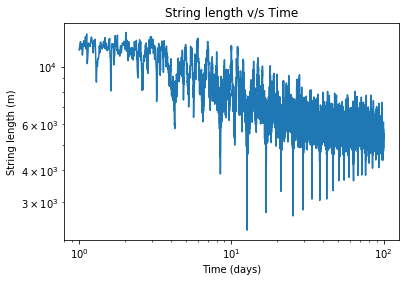

In [55]:
# Calculation for 10,000 periods
periods_1=np.linspace(1,100,10000 )# 10,000 periods  between 1 and 100 days
string_length_1=np.zeros(len(periods_1))

for j in range(len(periods_1)):   # loop for calculating the string lengths for the 10000 different periods
    string_length_1[j]=length(periods_1[j])
plt.loglog((periods_1),(string_length_1)) #We use np.loglog in order to make a plot with log scaling on both the x and y axis.

plt.title('String length v/s Time')
plt.xlabel('Time (days)')
plt.ylabel('String length (m)')

#### In the above plot we see several clear minimas corresponding to different string lengths and their corresponding periods. We consider only the 1st clear minima. The reason behind this is that higher minima correspond to a sine wave with more periods. As per the task description, we need to look for exactly one period, which should give enough information to fit the sinusoidal function. 

In [56]:
len_arr = np.array(string_length_1) # make an array containing all the string length values
new_len_arr = len_arr[(len_arr > (8700)) & (len_arr<(9000))] # we select only a small portion of the whole string length array in which the 1st clear minima is the minimum value. 
k1 = np.min(new_len_arr) #  this will give us the minimum string length we are looking for i.e. 1st clear minima
k=np.where(len_arr==k1) # thsi will give us the index at which the 1st clear minima lies
p=periods_1[k] # value of period corresponding to the 1st clear minima
print('The period corresponding to 1st clear minima is:',float(p),'days')


The period corresponding to 1st clear minima is: 1.297029702970297 days


Text(0.5, 0, 'Phase')

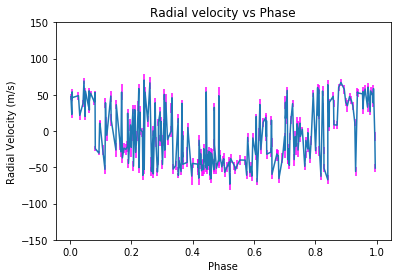

In [57]:
phase_min = (time%p)/p #phase correxponding to the period for which we get the 1st clear minima
ph_sort_min = np.sort(phase_min)
rad_vel_sort_min = rad_vel[np.argsort(phase_min)]
plt.errorbar(ph_sort_min,rad_vel_sort_min,yerr=err, ecolor='magenta')
plt.title('Radial velocity vs Phase')
plt.ylim(-150, 150)
plt.ylabel('Radial Velocity (m/s)')
plt.xlabel('Phase')

#### For the period we picked, we see something that looks similar to one period of a sinusoidal function. This means that there are indeed periodic (and in fact sinusoidal) variations in the radial velocity curve, indicating that a second object is most likely, orbiting the star.

The value of a from fit is: 35.01336281614671 m
The value of b from fit is: 20.475185973971957
The uncertainity in the value of a is: 2.912245717265427 m
The uncertainity in the value of b is: 0.08006592237265867


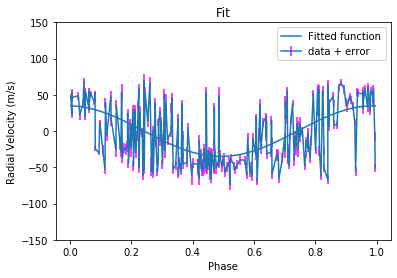

In [87]:
def sin_func(x,a,b): # we define a sinusoidal function of the form, a+sin(2*pi*x+b)
    return a*np.sin(2*np.pi*x+b)

params, params_covariance = opt.curve_fit(sin_func, ph_sort_min, rad_vel_sort_min) # We Use non-linear least squares method to fit the sinusoidal  function, to the data.
aerr= aerr=np.sqrt(params_covariance[0][0])# error in a
berr=np.sqrt(params_covariance[1][1]) #error in b
'''
params= the parameters 'a' and 'b'
params_covariance= covariance matrix containing variance and square root of the diagonal elements will give corresponding errors/uncertainity 
'''
print('The value of a from fit is:', float(params[0]),'m')
print('The value of b from fit is:', float(params[1]))
print('The uncertainity in the value of a is:',aerr,'m')
print('The uncertainity in the value of b is:',berr)
#plt.figure(figsize=(10, 6))
plt.errorbar(ph_sort_min,rad_vel_sort_min,yerr=err, ecolor='magenta', label='data + error')  # we plot the raidail velocity v/s phase with respected errorbars
plt.plot(ph_sort_min, sin_func(ph_sort_min, params[0], params[1]), label='Fitted function') # We fit the sine function to the above plot
plt.title('Fit')
plt.savefig('fit curve')

plt.legend(loc='best')
plt.ylim(-150, 150)
plt.ylabel('Radial Velocity (m/s)')
plt.xlabel('Phase')
plt.show()




#### The value the parameter $a$ will give the amplitude of the radial velocity curve

### Part 2: Task 2 

In [88]:
sin_i=1
G=6.64*10**(-11) # Gravitational constani in units of  m^3 kg ^-1 s^-2
M_star=1.98*10**(30) # Mass of sun in kg
T=p*24*60*60 # Orbital period in seconds
k_star_obs=params[0] # observed radial velocity amplitude 
M_jupiter=1.898*10**(27) # Mass of Jupiter

q=((T/(2*np.pi*G*M_star))**(1/3))*(k_star_obs/sin_i)# the ratio of the object mass to the mass of the star
print('The value of q is', float(q))

The value of q is 0.0001799080789386205


In [89]:
M_obj=q*M_star
print('The mass of the object is',float(M_obj/M_jupiter) , 'times the mass of Jupiter')

The mass of the object is 0.18768071459350294 times the mass of Jupiter


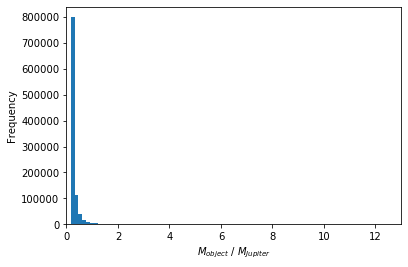

In [103]:
mu_K_obs_star, sigma_K_obs_star = params[0], aerr # prams[0]= amplitude of radial velocity obtained in previous task, aerr= respective uncertainity

M_1 = np.random.uniform(0.6*M_star, 1.4*M_star, 1000000) # the mass of the star is sampled from a uniform distribution between 0.6 and 1.4 times the mass of the Sun
K_1 = np.random.normal(mu_K_obs_star, sigma_K_obs_star, 1000000) # sampling of the radial velocity
cos_i = np.random.uniform(0, 1, 1000000) #sample  cos𝑖  uniformly between 0 and 1
sin_i=np.sqrt(1-(cos_i)**2)
def f(M_star,K_star_obs,sin_i):
    q=((T/(2*np.pi*G*M_star))**(1/3))*(k_star_obs/sin_i)

    return q

q_mc = f(M_1,K_1,sin_i) # mass ratios for different star mass, radial veocities and angle
mass_object= q_mc*M_star/M_jupiter # mass of object in the scale of Jupiter mass
values, bins, _ = plt.hist(mass_object, bins=2000)# histogram is plotted


plt.xlim(0,13)
plt.xlabel('${M_{object}}$ / ${M_{Jupiter}}$')
plt.ylabel('Frequency')
#plt.savefig('probablility')
plt.show()

In [108]:
actual_mass=mass_object[(0< mass_object) & (mass_object< 13)] # this give us the array containing all objects with mass less than 13 times the Jupiter mass
y=len(actual_mass)/len(mass_object) # tells us how much masses of all masses are below 13 Jupiter masses where 1000000 is no. of samples
'''
probability= No. of observed events/ Total no. of events
'''
print('Probability that the object is less massive than 13 times the mass of Jupiter is:',y)

Probability that the object is less massive than 13 times the mass of Jupiter is: 0.99989


#### We have:
#### $$y= Pr(\mu-x\sigma<M_{object}<\mu+x\sigma)= erf(\frac{z}{\sqrt{2}})$$
#### $$Pr(0<\frac{M_{object}}{M_{Jupiter}}<13)= 0.999878$$
#### $$x=\sqrt{2}{}  [erf^{-1}(y)]$$


In [105]:
k=(special.erfinv(y))*(np.sqrt(2))
print(k)

3.8674042434563893


####  From above we see that nearly all values of masses lie within 3 - 4 standard deviations of the mean. Comapring x$\sigma$ with [this table](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), we see that the confidence level is $\approx$99.98% - 99.99%. In the empirical sciences the so-called three-sigma rule of thumb expresses a conventional heuristic that nearly all values that are taken, lie within three standard deviations of the mean, and thus it is empirically useful to treat 99.98%-99.99% probability as near certainty that the object is a planet.